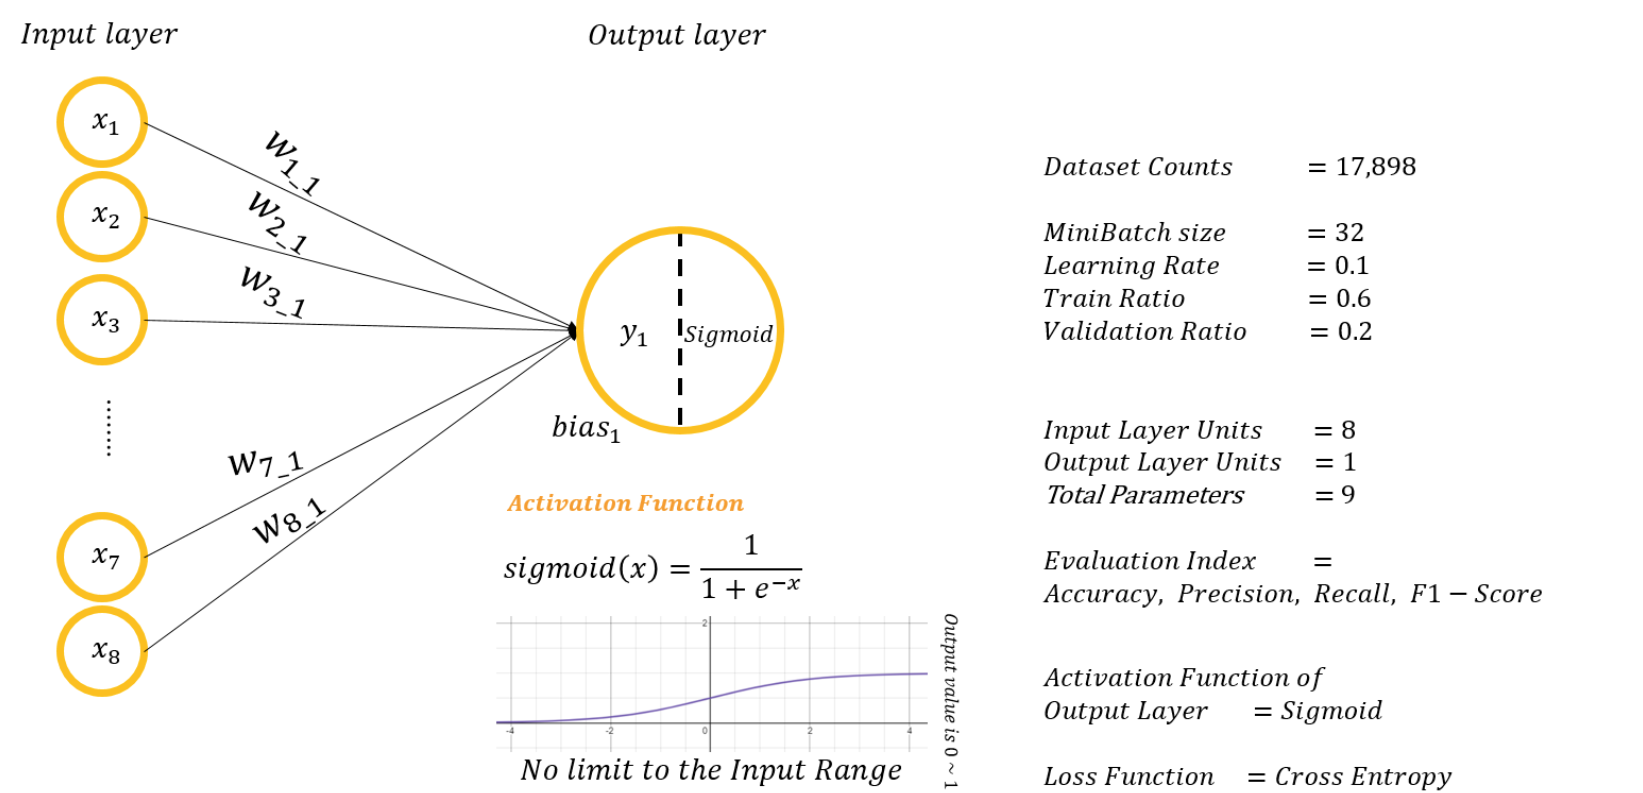

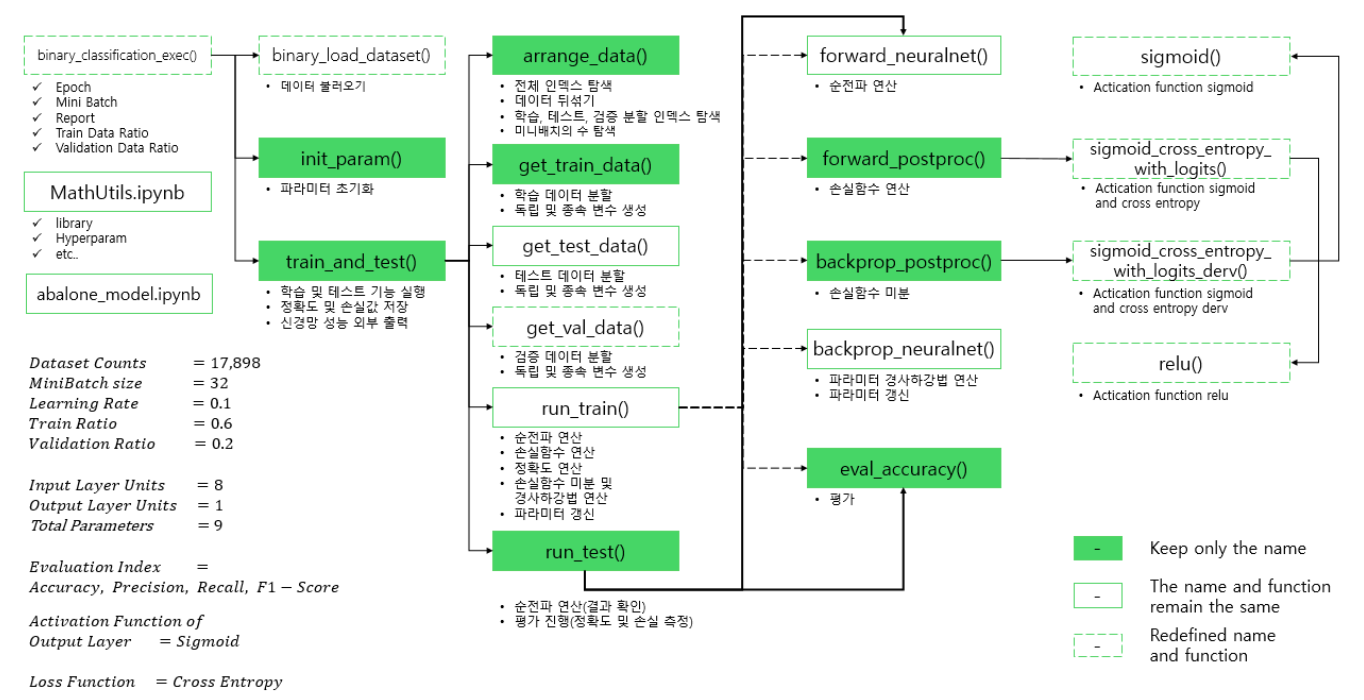

In [44]:
import pandas as pd 

In [45]:
df = pd.read_csv('pulsar_stars_mini.csv')
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,136.093750,51.691005,-0.045909,-0.271816,9.342809,38.096400,4.345438,18.673649,0
1,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
2,100.890625,51.890394,0.627487,-0.026498,3.883779,23.045267,6.953168,52.279440,0
3,116.203125,47.345862,0.211947,-0.022178,3.606187,18.944990,7.035645,59.231226,0
4,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
5,121.882812,53.042675,0.200521,-0.282219,2.116221,16.580876,8.947603,91.011762,0
6,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
7,135.859375,51.937272,0.065769,-0.366114,20.774247,52.772648,2.730909,6.607440,0
8,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1
9,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                10 non-null     float64
 1    Standard deviation of the integrated profile  10 non-null     float64
 2    Excess kurtosis of the integrated profile     10 non-null     float64
 3    Skewness of the integrated profile            10 non-null     float64
 4    Mean of the DM-SNR curve                      10 non-null     float64
 5    Standard deviation of the DM-SNR curve        10 non-null     float64
 6    Excess kurtosis of the DM-SNR curve           10 non-null     float64
 7    Skewness of the DM-SNR curve                  10 non-null     float64
 8   target_class                                   10 non-null     int64  
dtypes: float64(8), int64(1)
memory usage: 848.0 bytes


In [47]:
df = pd.read_csv('pulsar_stars.csv')

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns 

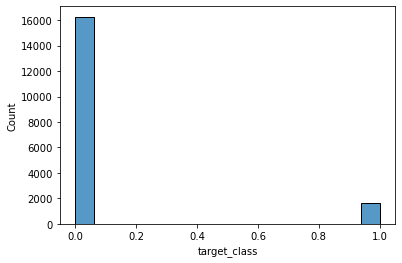

In [49]:
sns.histplot(df['target_class'])
plt.show()

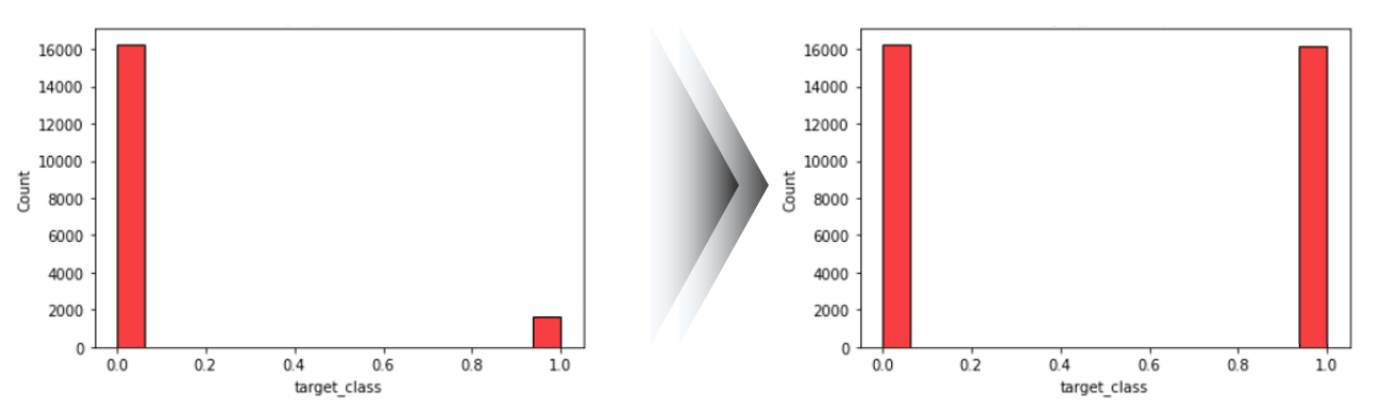

In [50]:
%run MathUtils.ipynb
%run abalone_model.ipynb

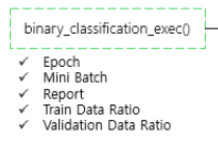

In [51]:
def binary_classification_exec(epoch_count = 10, mb_size = 10, report = 1, train_ratio = 0.6, val_ratio = 0.2):
    binary_load_dataset()
    init_param()
    train_metrics_mean_row, val_metrics_row, test_metrics = train_and_test(epoch_count, 
                                                                           mb_size, 
                                                                           report, 
                                                                           train_ratio, 
                                                                           val_ratio) # 검증데이터 추가 
    return train_metrics_mean_row, val_metrics_row, test_metrics

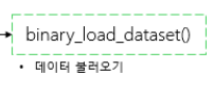

In [52]:
def binary_load_dataset():
    #with open('/content/pulsar_stars.csv') as csvfile:
    with open('pulsar_stars_mini.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)

        rows = []
        for row in csvreader:
            rows.append(row)
    
    global data, input_cnt, output_cnt

    input_cnt, output_cnt = 8, 1

    data = np.asarray(rows, dtype='float32')

In [53]:
binary_load_dataset()

In [54]:
data.shape

(10, 9)

In [55]:
data[:5]

array([[ 1.36093750e+02,  5.16910057e+01, -4.59089242e-02,
        -2.71816403e-01,  9.34280968e+00,  3.80964012e+01,
         4.34543800e+00,  1.86736488e+01,  0.00000000e+00],
       [ 9.93671875e+01,  4.15722008e+01,  1.54719698e+00,
         4.15410614e+00,  2.75551834e+01,  6.17190170e+01,
         2.20880795e+00,  3.66268015e+00,  1.00000000e+00],
       [ 1.00890625e+02,  5.18903961e+01,  6.27486527e-01,
        -2.64978018e-02,  3.88377929e+00,  2.30452671e+01,
         6.95316744e+00,  5.22794418e+01,  0.00000000e+00],
       [ 1.16203125e+02,  4.73458633e+01,  2.11946830e-01,
        -2.21777037e-02,  3.60618734e+00,  1.89449902e+01,
         7.03564453e+00,  5.92312241e+01,  0.00000000e+00],
       [ 1.20554688e+02,  4.55499039e+01,  2.82923996e-01,
         4.19908702e-01,  1.35869563e+00,  1.30790339e+01,
         1.33121414e+01,  2.12597031e+02,  1.00000000e+00]], dtype=float32)

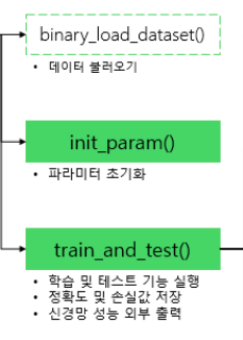

In [56]:
def init_param():
    global weight, bias 

    weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
    bias   = np.zeros([output_cnt])

    print("Initial weight value : \n", weight)
    print("Initial bias value : \n", bias)

In [57]:
init_param()

Initial weight value : 
 [[ 0.03571003]
 [ 0.04721385]
 [ 0.05054187]
 [-0.00679318]
 [-0.06673189]
 [ 0.02308464]
 [-0.00672881]
 [ 0.01855845]]
Initial bias value : 
 [0.]


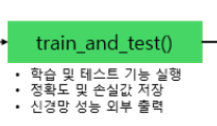

In [58]:
def train_and_test():
    pass # 함수 내부 기능 구축 후 작성 예정  

In [59]:
 train_and_test()

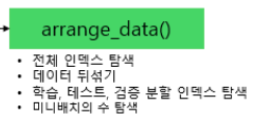

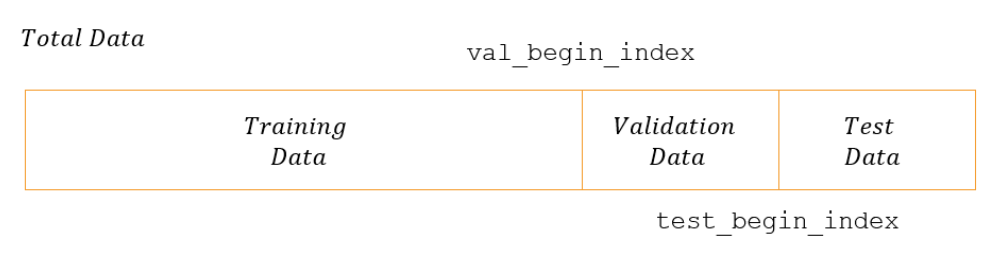

In [60]:
def arrange_data(mb_size, train_ratio, val_ratio):
    global shuffle_map, test_begin_index, val_begin_index

    shuffle_map = np.arange(data.shape[0])

    np.random.shuffle(shuffle_map)

    mini_batch_step_count = int(data.shape[0] * train_ratio) // mb_size 

    val_begin_index = mini_batch_step_count * mb_size
    test_begin_index = int(val_begin_index + (val_ratio * data.shape[0]))

    return mini_batch_step_count

In [61]:
mini_batch_step_count = arrange_data(mb_size=1, train_ratio = 0.6, val_ratio = 0.2)
print("mini_batch_step_count : ", mini_batch_step_count)
print("val_begin_index : ", val_begin_index)
print("test_begin_index : ", test_begin_index)

mini_batch_step_count :  6
val_begin_index :  6
test_begin_index :  8


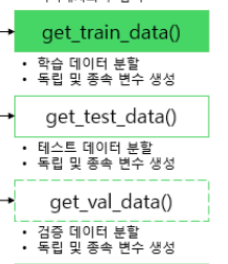

In [62]:
def get_test_data():
    test_data = data[shuffle_map[test_begin_index : ]]
    return test_data[:, : -output_cnt], test_data[:, -output_cnt : ]

def get_val_data():
    val_data = data[shuffle_map[ val_begin_index : test_begin_index ]]
    return val_data[:, : -output_cnt], val_data[:, -output_cnt : ]

# 학습 데이터를 생성하는 함수 (미니배치 기능 추가)
def get_train_data(mb_size, n):
    from_idx = n * mb_size 
    to_idx   = (n + 1) * mb_size
    
    train_data = data[shuffle_map[from_idx : to_idx]]

    return train_data[:, : -output_cnt], train_data[:, -output_cnt : ]

In [63]:
test_X, test_Y   = get_test_data()
val_X, val_Y     = get_val_data()
train_X, train_Y = get_train_data(2,0)

In [64]:
print(test_X.shape, test_Y.shape)
print(val_X.shape, val_Y.shape)
print(train_X.shape, train_Y.shape)

(2, 8) (2, 1)
(2, 8) (2, 1)
(2, 8) (2, 1)


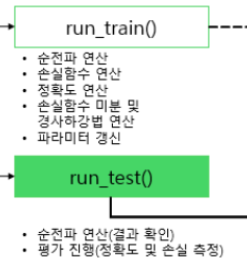

In [65]:
def run_train(x, y):
    loss     = 0
    accuracy = 100

    return loss, accuracy

In [66]:
train_loss, train_acc = run_train(0, 0)
print(train_loss, train_acc)

0 100


In [67]:
def run_test(x, y):
    loss     = 0
    accuracy = 100

    return loss, accuracy

In [68]:
test_loss, test_acc = run_test(0, 0)
print(test_loss, test_acc)

0 100


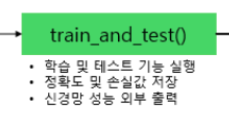

In [69]:
def train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio):

    mini_batch_step_count = arrange_data(mb_size, train_ratio, val_ratio)

    test_x, test_y = get_test_data()
    # 새롭게 추가된 코드 ▼
    val_x, val_y   = get_val_data()

    # 새롭게 추가된 코드 ▼
    val_loss_row, val_acc_row      = [], []
    losses_mean_row, accs_mean_row = [], []
    # 에폭에 따른 반복문 
    for epoch in range(epoch_count):

        losses = []
        accs   = []
        # 배치에 따른 반복문 
        for n in range(mini_batch_step_count):
            train_x, train_y = get_train_data(mb_size, n)

            loss, acc        = run_train(train_x, train_y)

            losses.append(loss)
            accs.append(acc)
            
        # 새롭게 추가된 코드 ▼
        val_loss, val_acc = run_test(val_x, val_y)
        val_loss_row.append(val_loss)
        val_acc_row.append(val_acc)

        if report > 0 and (epoch + 1) % report == 0:
            print("Epoch {} : Train - Loss = {:.3f}, Accuracy = {:.3f} / Val - Loss = {:.3f}, Accuracy = {:.3f}".\
                  format(epoch + 1, np.mean(losses), np.mean(accs), val_loss, val_acc))
            
        
        losses_mean = np.mean(losses)
        accs_mean   = np.mean(accs)

        losses_mean_row.append(losses_mean)
        accs_mean_row.append(accs_mean)

    # 테스트 데이터를 가지고 테스트 수행
    test_loss, test_acc = run_test(test_x, test_y)

    print('\n', "=" * 40, "Final Test", "=" * 40)
    print("\nTest Accuracy = {:.3f}".format(test_acc))
    print("\nTest Loss     = {:.3f}".format(test_loss))

    return [losses_mean_row, accs_mean_row], [val_loss_row, val_acc_row], [test_loss, test_acc]


In [70]:
train_metrics_mean_row, val_metrics_row, test_metrics = train_and_test(epoch_count     = 100, 
                                                                           mb_size     = 1, 
                                                                           report      = 1, 
                                                                           train_ratio = 0.6, 
                                                                           val_ratio   = 0.2)

Epoch 1 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 2 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 3 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 4 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 5 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 6 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 7 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 8 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 9 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 10 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 11 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accur

In [71]:
def forward_neuralnet(x):
    y_hat = np.matmul(x, weight) + bias
    return y_hat, x

In [72]:
y_hat, _ = forward_neuralnet(train_X)
print("y_hat : \n", y_hat)

y_hat : 
 [[-1.0521457 ]
 [10.53419806]]


In [73]:
def relu(x):
    return np.maximum(x, 0)

In [75]:
relu(-15)

0

In [78]:
import numpy as np

In [79]:
#z는 실제 확률 분포, / x는 신경망이 출력해낸 값
def sigmoid_cross_entropy_with_logits(x,z):
    return relu(x) - x*z + np.log(1+np.exp(-np.abs(x)))

In [ ]:
sigmoid_cross_entropy_with_logits()